## **Examen de cinturón AML – Opción A**

**Descripción del examen:**
En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

**Dataset:**
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis 

# Descripción del Dataset

Este dataset contiene información de marketing con 2240 registros y 29 columnas. A continuación, se describe cada variable:

| **#** | **Variable**            | **Tipo**   | **Descripción**                                                                          |
|-------|-------------------------|------------|------------------------------------------------------------------------------------------|
| 1     | ID                     | `int64`    | Identificador único para cada cliente.                                                  |
| 2     | Year_Birth             | `int64`    | Año de nacimiento del cliente.                                                          |
| 3     | Education              | `object`   | Nivel educativo del cliente (por ejemplo, Primaria, Secundaria, Universidad).           |
| 4     | Marital_Status         | `object`   | Estado civil del cliente (por ejemplo, Soltero, Casado, Divorciado).                   |
| 5     | Income                 | `float64`  | Ingreso anual del cliente en dólares. Algunos valores son nulos.                       |
| 6     | Kidhome                | `int64`    | Número de niños pequeños en el hogar del cliente.                                       |
| 7     | Teenhome               | `int64`    | Número de adolescentes en el hogar del cliente.                                         |
| 8     | Dt_Customer            | `object`   | Fecha en la que el cliente fue registrado.                                              |
| 9     | Recency                | `int64`    | Días desde la última compra del cliente.                                                |
| 10    | MntWines               | `int64`    | Gasto del cliente en vinos en los últimos dos años.                                     |
| 11    | MntFruits              | `int64`    | Gasto del cliente en frutas en los últimos dos años.                                    |
| 12    | MntMeatProducts        | `int64`    | Gasto del cliente en productos cárnicos en los últimos dos años.                        |
| 13    | MntFishProducts        | `int64`    | Gasto del cliente en productos de pescado en los últimos dos años.                     |
| 14    | MntSweetProducts       | `int64`    | Gasto del cliente en productos dulces en los últimos dos años.                         |
| 15    | MntGoldProds           | `int64`    | Gasto del cliente en productos de oro en los últimos dos años.                         |
| 16    | NumDealsPurchases      | `int64`    | Número de compras realizadas con descuento.                                             |
| 17    | NumWebPurchases        | `int64`    | Número de compras realizadas a través de la web.                                        |
| 18    | NumCatalogPurchases    | `int64`    | Número de compras realizadas a través de catálogos.                                     |
| 19    | NumStorePurchases      | `int64`    | Número de compras realizadas en tiendas físicas.                                        |
| 20    | NumWebVisitsMonth      | `int64`    | Número de visitas a la web del cliente en el último mes.                                |
| 21    | AcceptedCmp3           | `int64`    | Indica si el cliente aceptó la tercera campaña de marketing (1: Sí, 0: No).            |
| 22    | AcceptedCmp4           | `int64`    | Indica si el cliente aceptó la cuarta campaña de marketing (1: Sí, 0: No).             |
| 23    | AcceptedCmp5           | `int64`    | Indica si el cliente aceptó la quinta campaña de marketing (1: Sí, 0: No).             |
| 24    | AcceptedCmp1           | `int64`    | Indica si el cliente aceptó la primera campaña de marketing (1: Sí, 0: No).            |
| 25    | AcceptedCmp2           | `int64`    | Indica si el cliente aceptó la segunda campaña de marketing (1: Sí, 0: No).            |
| 26    | Complain               | `int64`    | Indica si el cliente presentó alguna queja en los últimos dos años (1: Sí, 0: No).     |
| 27    | Z_CostContact          | `int64`    | Costo fijo del contacto con el cliente (columna constante).                             |
| 28    | Z_Revenue              | `int64`    | Ingreso fijo asociado al cliente (columna constante).                                   |
| 29    | Response               | `int64`    | Indica si el cliente respondió positivamente a la última campaña (1: Sí, 0: No).       |


In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter
from scipy.stats import chi2_contingency

In [2]:
import pandas as pd

# Carga de datos con separador de tabulador
data_path = "../data/marketing_campaign.csv"
df = pd.read_csv(data_path, sep='\t')

# Visualizar las primeras filas del DataFrame
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print(df.tail())  # Últimas 5 filas

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
print(df.shape)

(2240, 29)


In [7]:
# Revisar tipos de datos
print("Tipos de datos en el dataset:")
print(df.dtypes)

Tipos de datos en el dataset:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [10]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Income,2216,24,1.07
ID,2240,0,0.00
NumDealsPurchases,2240,0,0.00
Z_Revenue,2240,0,0.00
Z_CostContact,2240,0,0.00
Complain,2240,0,0.00
AcceptedCmp2,2240,0,0.00
AcceptedCmp1,2240,0,0.00
AcceptedCmp5,2240,0,0.00
AcceptedCmp4,2240,0,0.00


**Tratar valores nulos**

In [11]:
# Filtrar columnas con valores nulos
columnas_nulas = df.columns[df.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df[columnas_nulas].isnull().sum()
print(valores_nulos)

Income    24
dtype: int64


**Inputar los valores nulos con la media del grupo**

In [12]:
# Calcular la media de 'Income' agrupando por 'Education' y 'Year_Birth'
income_mean = df.groupby(['Education', 'Year_Birth'])['Income'].mean()

# Rellenar los valores nulos en 'Income' con la media correspondiente
df['Income'] = df.apply(
    lambda row: income_mean[row['Education'], row['Year_Birth']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)


In [13]:
# Filtrar columnas con valores nulos
columnas_nulas = df.columns[df.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df[columnas_nulas].isnull().sum()
print(valores_nulos)

Series([], dtype: float64)


In [14]:
# Mostrar las filas duplicadas
filas_duplicadas = df[df.duplicated()]
print(filas_duplicadas)

# Contar cuántas filas duplicadas existen
cantidad_duplicadas = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicadas}")

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]
Cantidad de filas duplicadas: 0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Cambiar a category**

In [16]:
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')



In [17]:
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y', errors='coerce')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [19]:
education_counts = df['Education'].value_counts()
print(education_counts)
marital_status_counts = df['Marital_Status'].value_counts()
print(marital_status_counts)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


**Consistencia en la variables categoricas**

In [20]:
import utils
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3,4,5,6,7
Education,Graduation,PhD,Master,Basic,2n Cycle,None,None,None
Marital_Status,Single,Together,Married,Divorced,Widow,Alone,Absurd,YOLO


In [21]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
ID,2240,0,0.0
NumDealsPurchases,2240,0,0.0
Z_Revenue,2240,0,0.0
Z_CostContact,2240,0,0.0
Complain,2240,0,0.0
AcceptedCmp2,2240,0,0.0
AcceptedCmp1,2240,0,0.0
AcceptedCmp5,2240,0,0.0
AcceptedCmp4,2240,0,0.0
AcceptedCmp3,2240,0,0.0


Matriz de Correlación:
                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.012419  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.162980  0.230176 -0.352111   
Income               0.012419   -0.162980  1.000000 -0.425456  0.019992   
Kidhome              0.002406    0.230176 -0.425456  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019992 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003120  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.576759 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.428892 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.575726 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.437891 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.436468 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.322363 -0.349595 -0.021725   
Nu

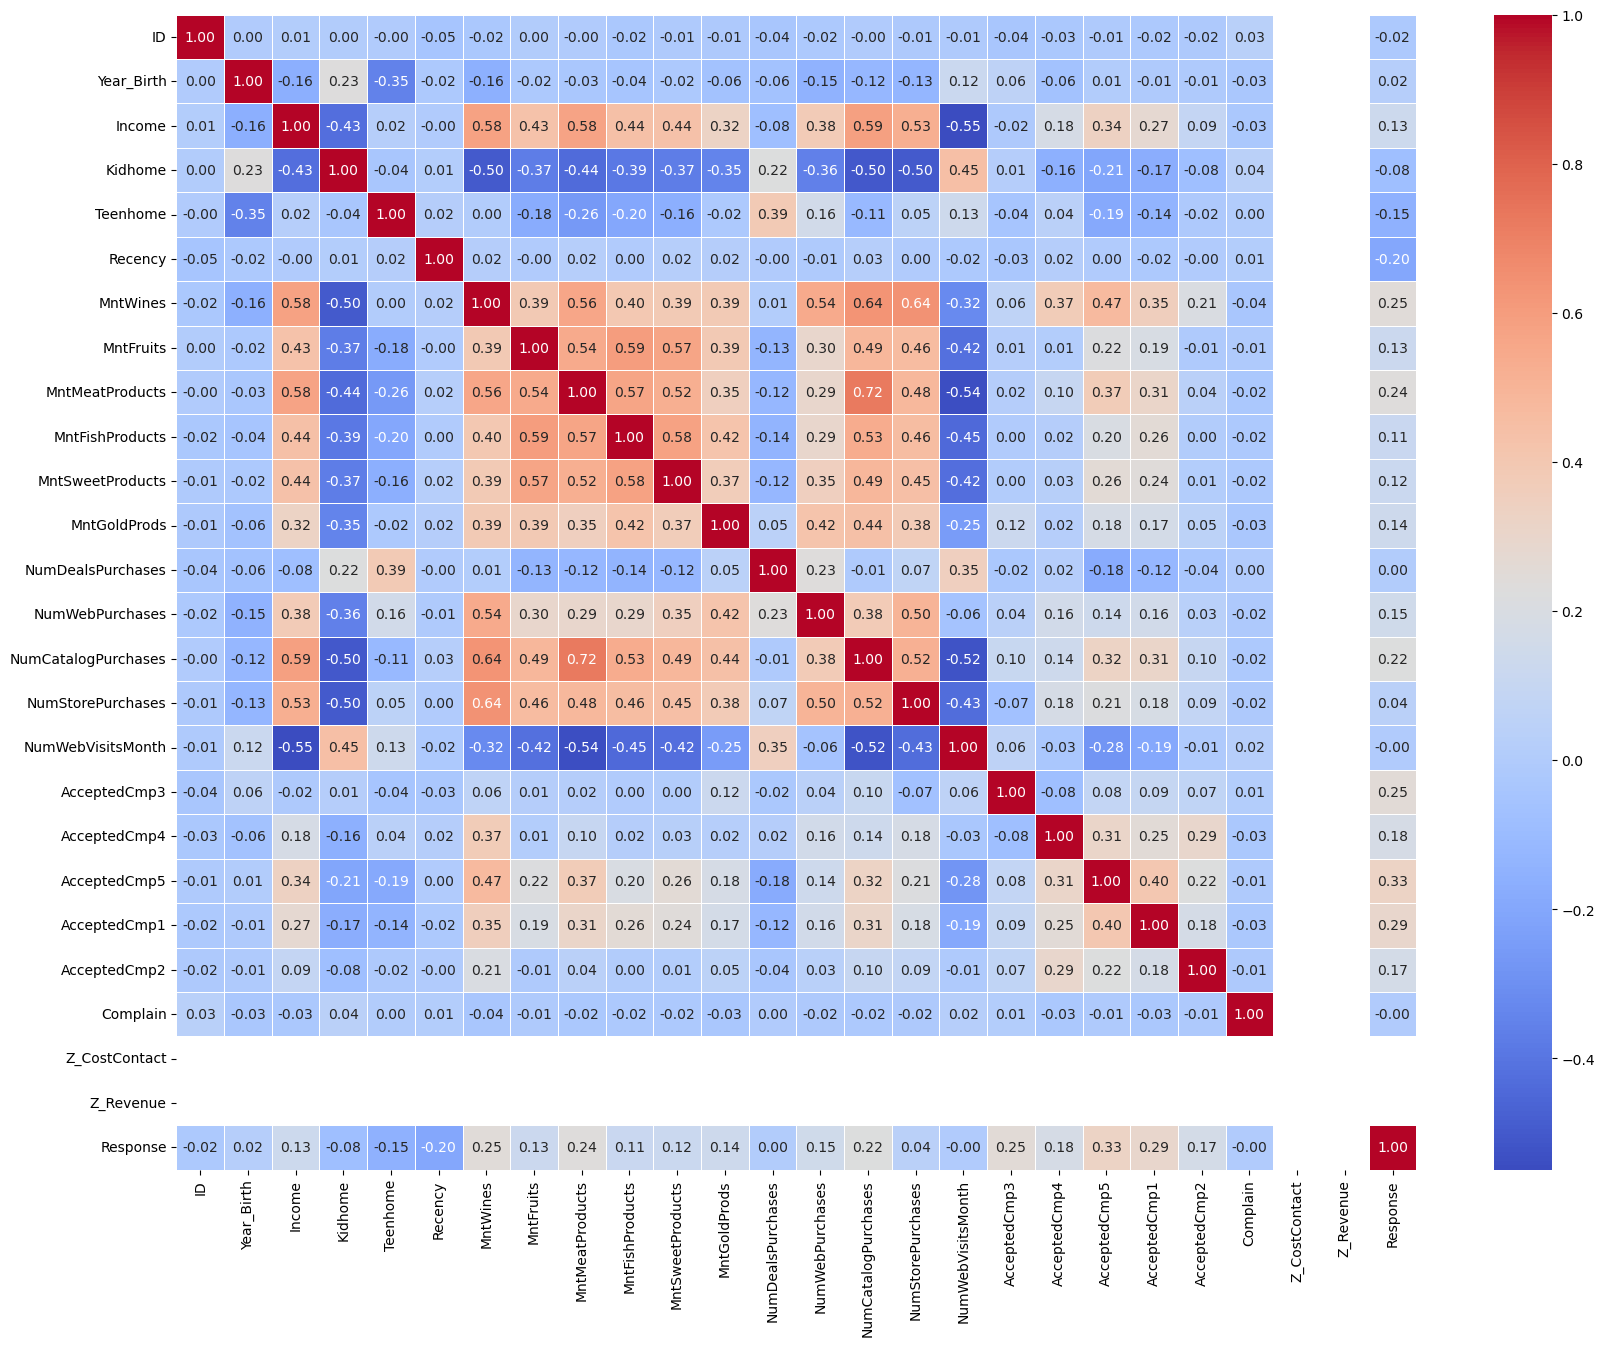

In [22]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
# Ejemplo de cómo cargar el DataFrame (puedes omitirlo si ya tienes 'df' cargado)
# df = pd.read_csv('tu_archivo.csv')

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las variables numéricas
corr_matrix = df_numeric.corr()

# Imprimir la tabla de correlación
print("Matriz de Correlación:")
print(corr_matrix)

# Configurar y visualizar la matriz de correlación
plt.figure(figsize=(20, 15))  # Definir el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.show()


**Resumen de patrones:**
* Las variables relacionadas con el gasto (MntWines, MntMeatProducts, MntFruits, etc.) tienden a mostrar correlaciones positivas con Income, lo que indica que las personas con mayores ingresos gastan más en productos.
* El comportamiento de compra en diferentes canales (por ejemplo, NumWebPurchases y NumCatalogPurchases) también muestra una correlación significativa.
* La relación entre los niños y adolescentes en casa es débilmente positiva, lo que sugiere que la presencia de uno puede estar asociada con la presencia del otro, pero no de manera fuerte.

**Graficos**

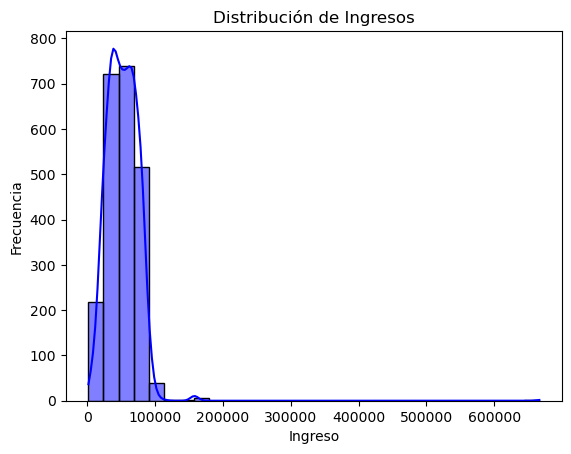

In [23]:
sns.histplot(df['Income'], kde=True, color='blue', bins=30)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()


**Descripcion:**
* Hay mayor cantidad de valores con monto menor. Hay uno que esta muy alto, outliers

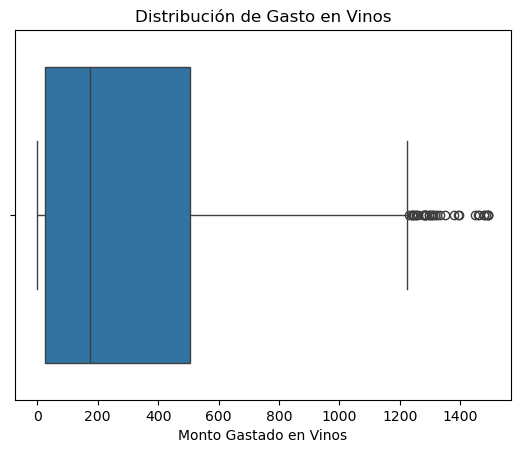

In [24]:
sns.boxplot(x=df['MntWines'])
plt.title('Distribución de Gasto en Vinos')
plt.xlabel('Monto Gastado en Vinos')
plt.show()


**Descripcion**
* Muestra la concentracion de gastos por vino

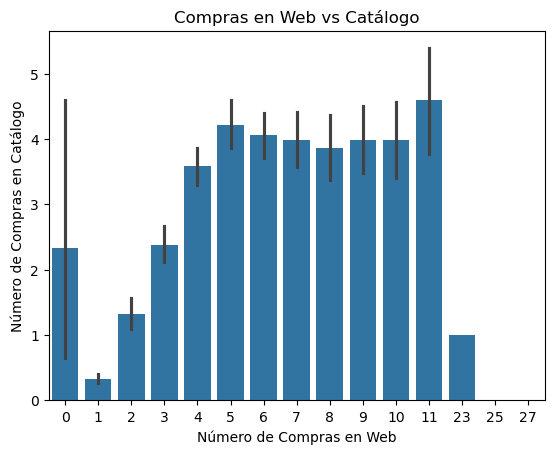

In [25]:
sns.barplot(x=df['NumWebPurchases'], y=df['NumCatalogPurchases'])
plt.title('Compras en Web vs Catálogo')
plt.xlabel('Número de Compras en Web')
plt.ylabel('Número de Compras en Catálogo')
plt.show()


**Descripcion:** 
* distribuicion de compra en la web

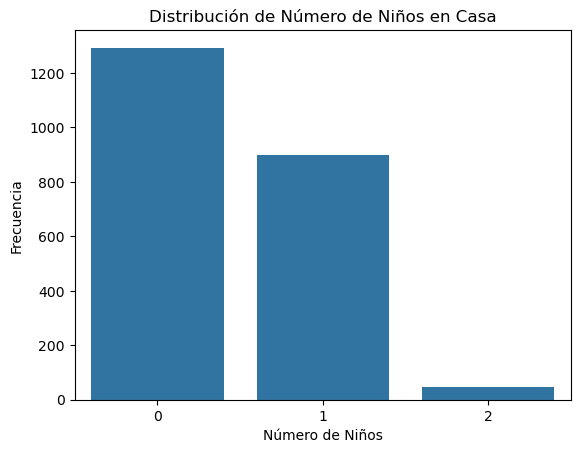

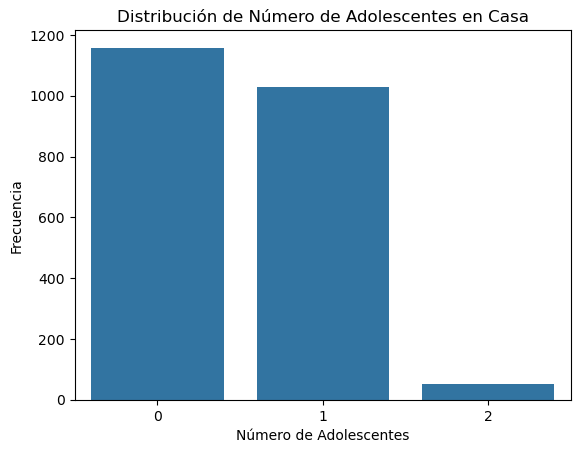

In [26]:
sns.countplot(x=df['Kidhome'])
plt.title('Distribución de Número de Niños en Casa')
plt.xlabel('Número de Niños')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x=df['Teenhome'])
plt.title('Distribución de Número de Adolescentes en Casa')
plt.xlabel('Número de Adolescentes')
plt.ylabel('Frecuencia')
plt.show()


**Descripcion:** 

* Muestra datos de adolescente

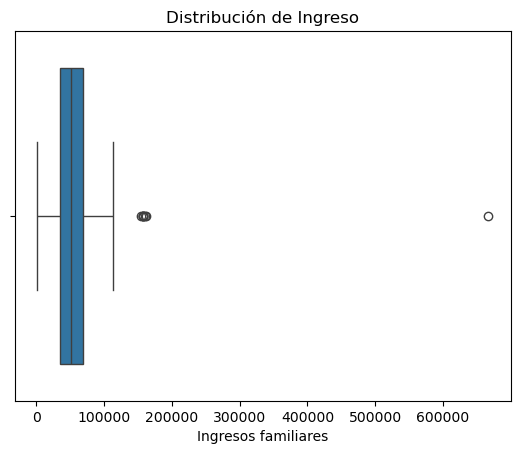

In [27]:
sns.boxplot(x=df['Income'])
plt.title('Distribución de Ingreso')
plt.xlabel('Ingresos familiares')
plt.show()

**Gráficos Multivariados:**

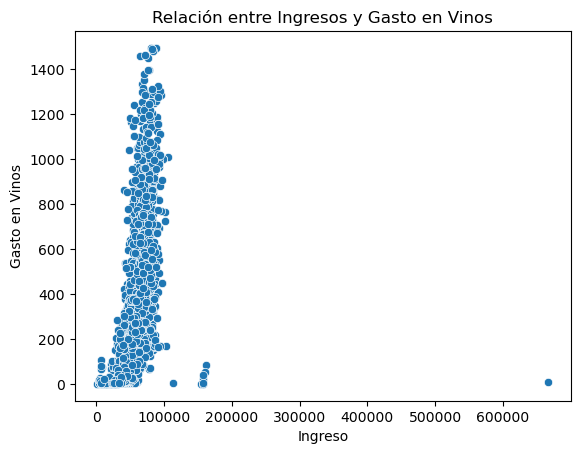

In [28]:
sns.scatterplot(x=df['Income'], y=df['MntWines'])
plt.title('Relación entre Ingresos y Gasto en Vinos')
plt.xlabel('Ingreso')
plt.ylabel('Gasto en Vinos')
plt.show()


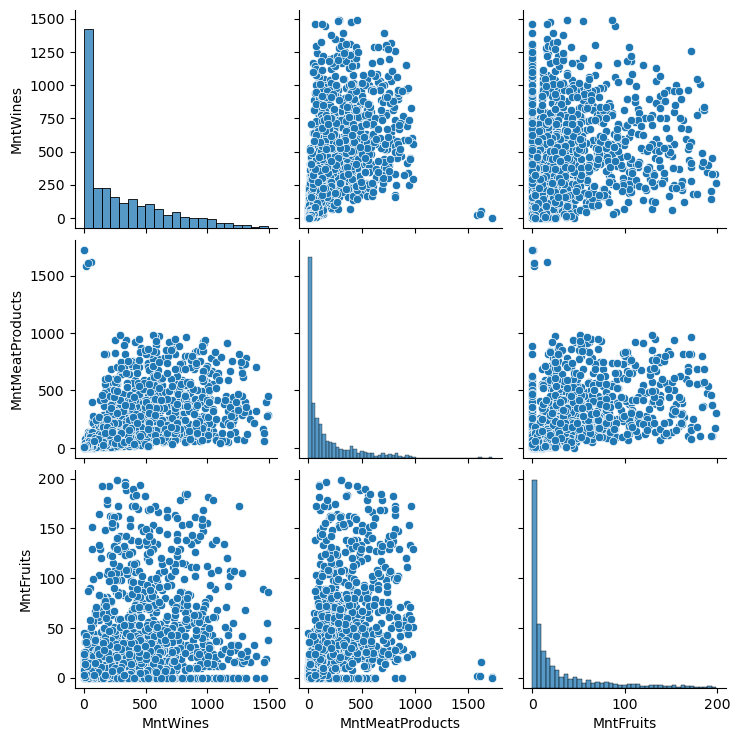

In [29]:
sns.pairplot(df[['MntWines', 'MntMeatProducts', 'MntFruits']])
plt.show()


**Descripcion:**

Muestra cómo una variable se relaciona con otra. 
* 'MntWines': Gastos en vino.
* 'MntMeatProducts': Gastos en productos de carne.
* 'MntFruits': Gastos en frutas.


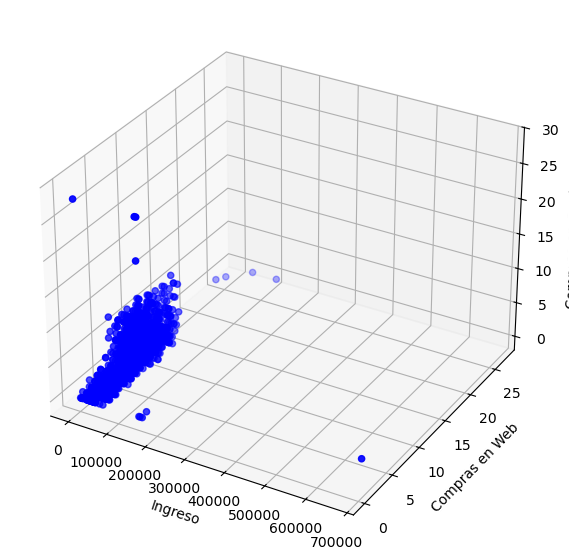

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Income'], df['NumWebPurchases'], df['NumCatalogPurchases'], c='b', marker='o')
ax.set_xlabel('Ingreso')
ax.set_ylabel('Compras en Web')
ax.set_zlabel('Compras en Catálogo')

plt.show()


**Observacion:**
* Visualiza como se concentra los datos en 3D

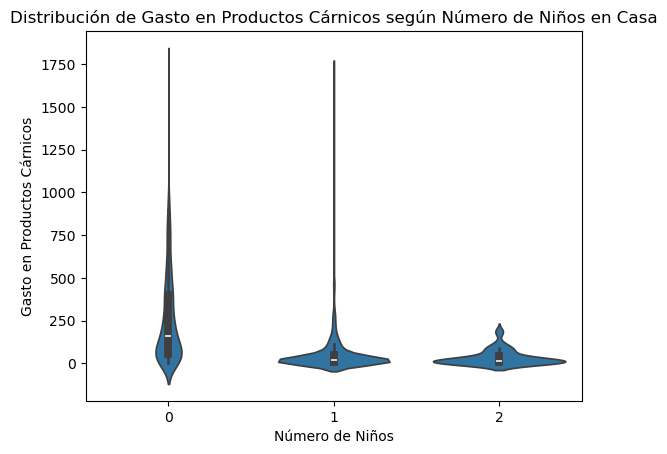

In [31]:
sns.violinplot(x=df['Kidhome'], y=df['MntMeatProducts'])
plt.title('Distribución de Gasto en Productos Cárnicos según Número de Niños en Casa')
plt.xlabel('Número de Niños')
plt.ylabel('Gasto en Productos Cárnicos')
plt.show()


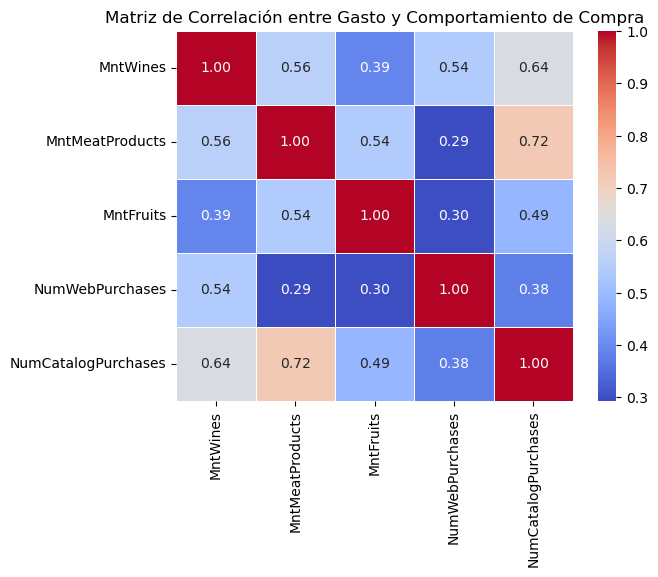

In [32]:
corr_matrix = df[['MntWines', 'MntMeatProducts', 'MntFruits', 'NumWebPurchases', 'NumCatalogPurchases']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Gasto y Comportamiento de Compra')
plt.show()


**Descripcion:**
* Grafique de vuelta la correlacion mas fuerte


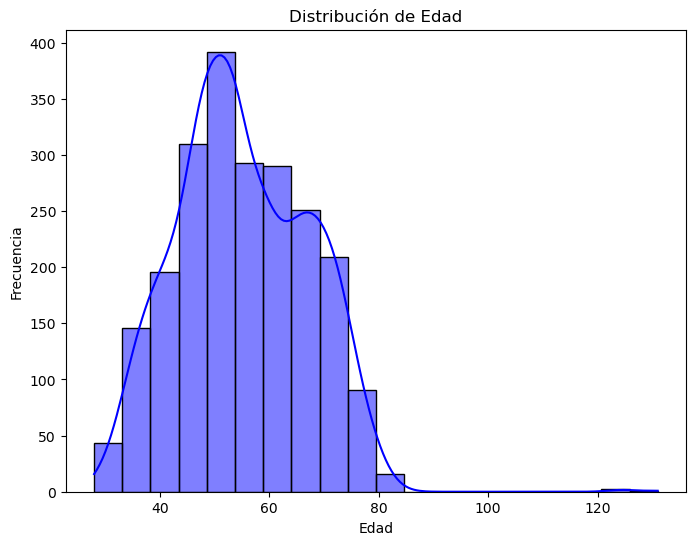

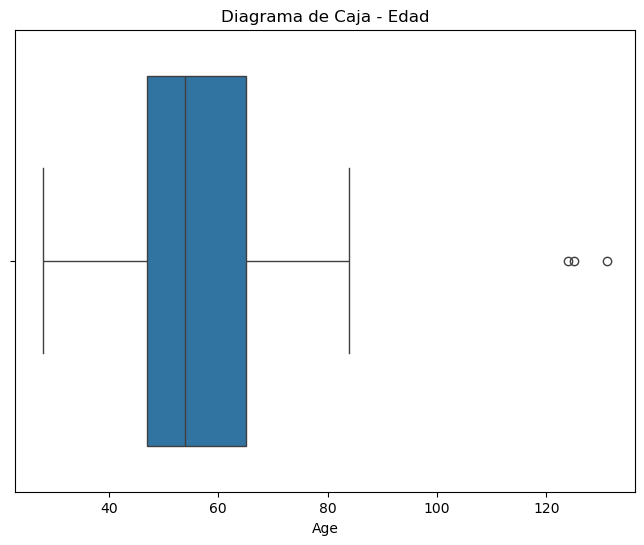

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear columna Edad a partir del año de nacimiento
df['Age'] = 2024 - df['Year_Birth']

# Ver un resumen de la edad
df['Age'].describe()

# Histograma de Edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para Edad
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Diagrama de Caja - Edad')
plt.show()


In [34]:
# Descripción estadística de Ingreso
df['Income'].describe()

count      2240.000000
mean      52241.605044
std       25050.293926
min        1730.000000
25%       35538.750000
50%       51411.500000
75%       68325.000000
max      666666.000000
Name: Income, dtype: float64

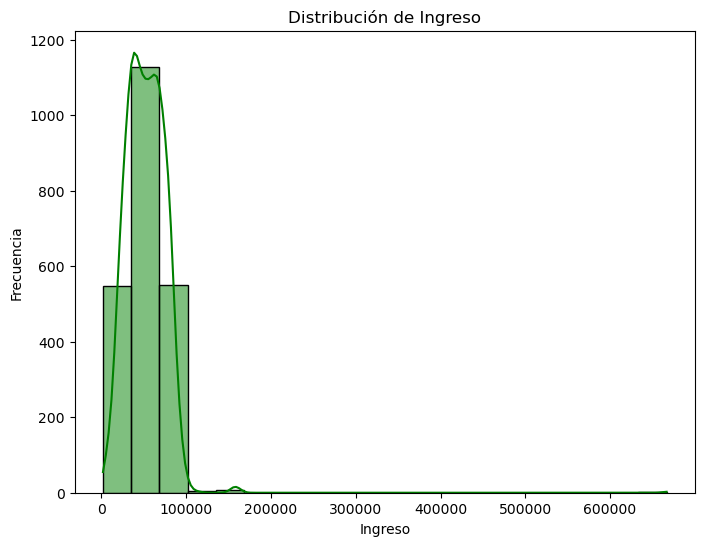

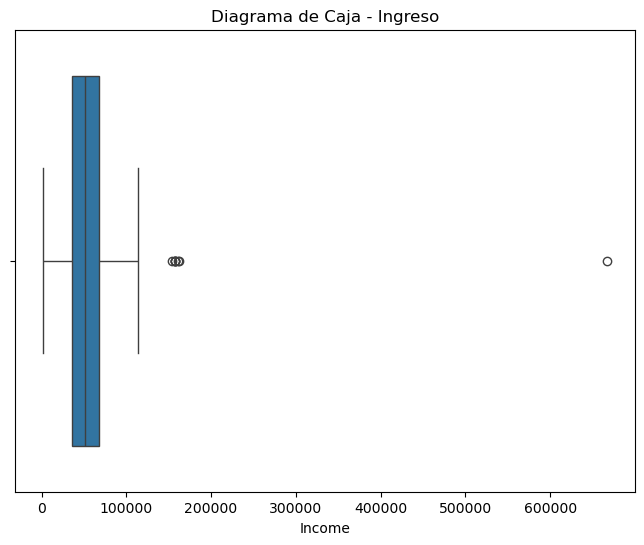

In [35]:
# Histograma de Ingreso
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True, color='green', bins=20)
plt.title('Distribución de Ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para Ingreso
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Diagrama de Caja - Ingreso')
plt.show()


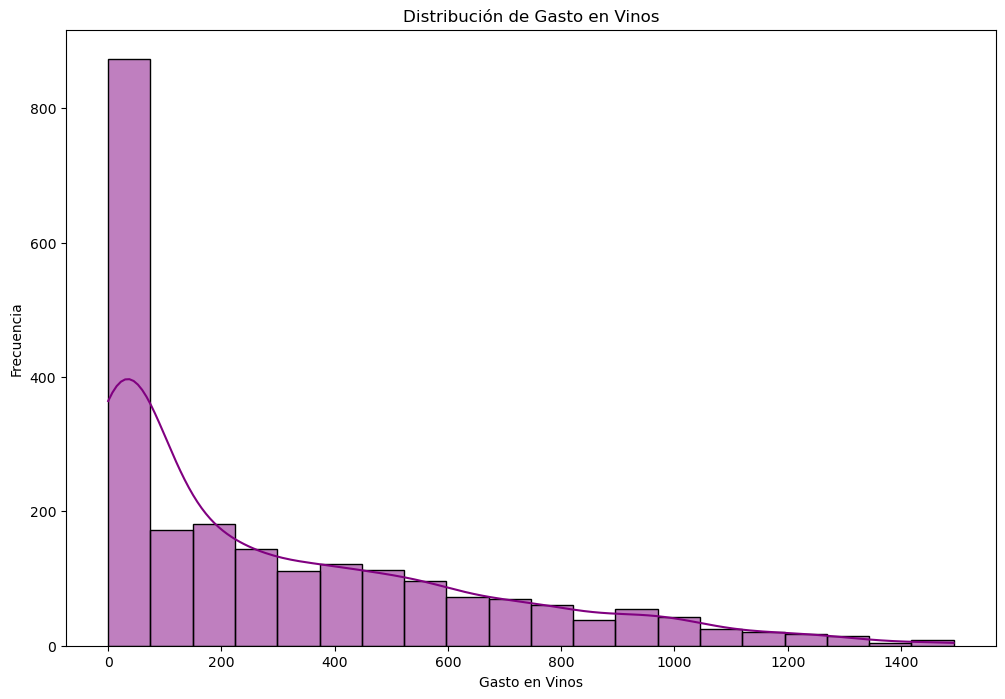

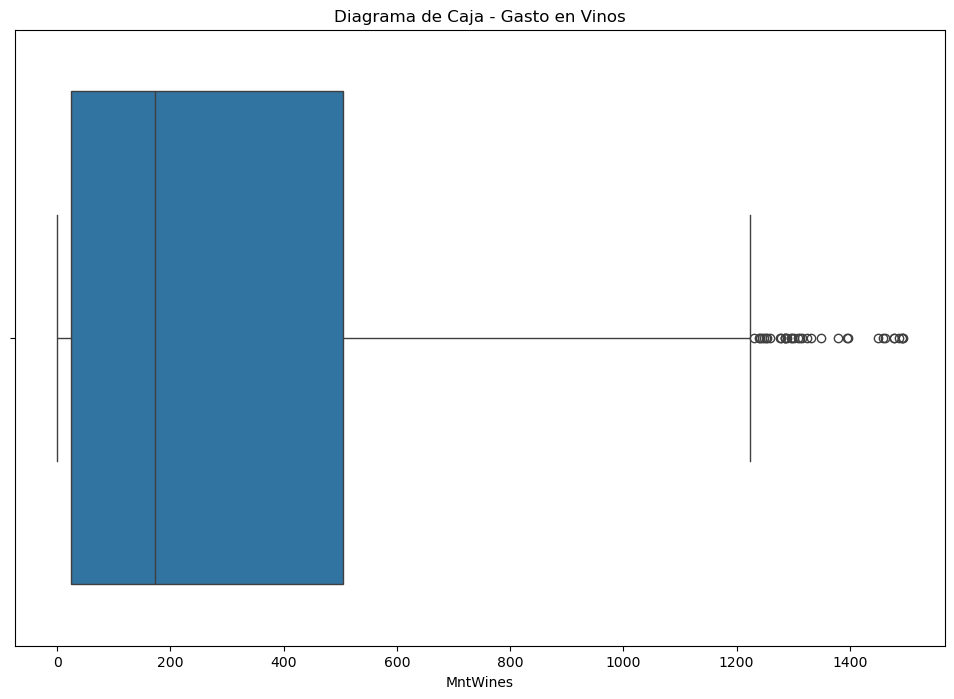

In [36]:
# Resumen de gastos en productos
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe()

# Histograma de los gastos
plt.figure(figsize=(12, 8))
sns.histplot(df['MntWines'], kde=True, color='purple', bins=20)
plt.title('Distribución de Gasto en Vinos')
plt.xlabel('Gasto en Vinos')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja para gastos
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['MntWines'])
plt.title('Diagrama de Caja - Gasto en Vinos')
plt.show()


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual 

In [37]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
ID,0.0,0.000000,0.0,11191.0
Year_Birth,3.0,0.133929,1940.0,1996.0
Income,8.0,0.357143,1730.0,113734.0
Kidhome,0.0,0.000000,0.0,2.0
Teenhome,0.0,0.000000,0.0,2.0
Recency,0.0,0.000000,0.0,99.0
MntWines,35.0,1.562500,0.0,1224.0
MntFruits,227.0,10.133929,0.0,81.0
MntMeatProducts,175.0,7.812500,0.0,555.0
MntFishProducts,223.0,9.955357,0.0,120.0


In [38]:
df[numerical_columns].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52241.605044,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196
std,3246.662198,11.984069,25050.293926,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,5458.500000,1970.000000,51411.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,8427.750000,1977.000000,68325.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000


**Elimino de forma manual, registros con datos outliers**

In [39]:

df = df[df['Year_Birth'] >= 1901]
df = df[df['Income'] <= 200000]

In [40]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
ID,0.0,0.000000,0.0,11191.0
Year_Birth,0.0,0.000000,1940.0,1996.0
Income,7.0,0.313059,1730.0,113734.0
Kidhome,0.0,0.000000,0.0,2.0
Teenhome,0.0,0.000000,0.0,2.0
Recency,0.0,0.000000,0.0,99.0
MntWines,35.0,1.565295,0.0,1224.0
MntFruits,226.0,10.107335,0.0,81.0
MntMeatProducts,174.0,7.781753,0.0,555.0
MntFishProducts,223.0,9.973166,0.0,120.0


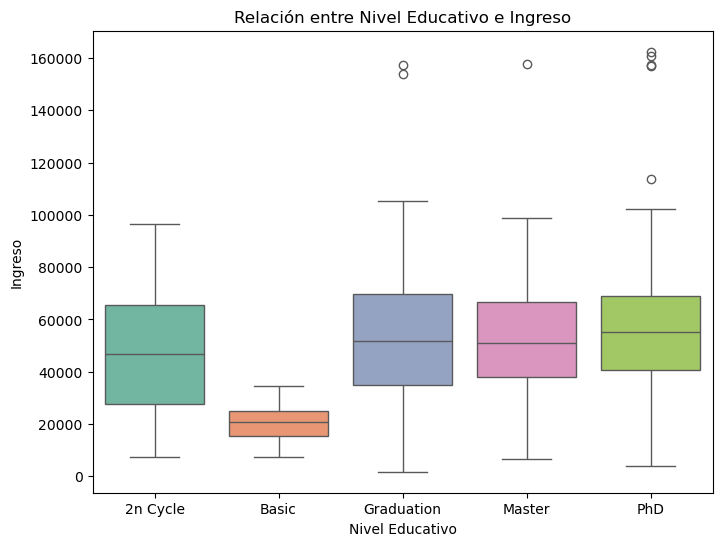

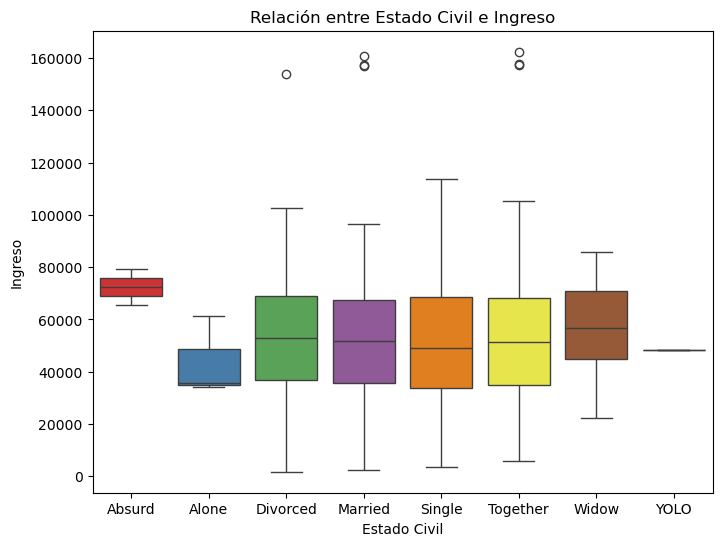

In [41]:
# Relación entre Education y Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='Income', hue='Education', data=df, palette='Set2')
plt.title('Relación entre Nivel Educativo e Ingreso')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso')
plt.show()

# Relación entre Marital_Status y Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital_Status', y='Income', hue='Marital_Status', data=df, palette='Set1')
plt.title('Relación entre Estado Civil e Ingreso')
plt.xlabel('Estado Civil')
plt.ylabel('Ingreso')
plt.show()

**Descripcion:_**
* Despues de eliminar los valores outliers mejoro la visualizacion de los graficos.

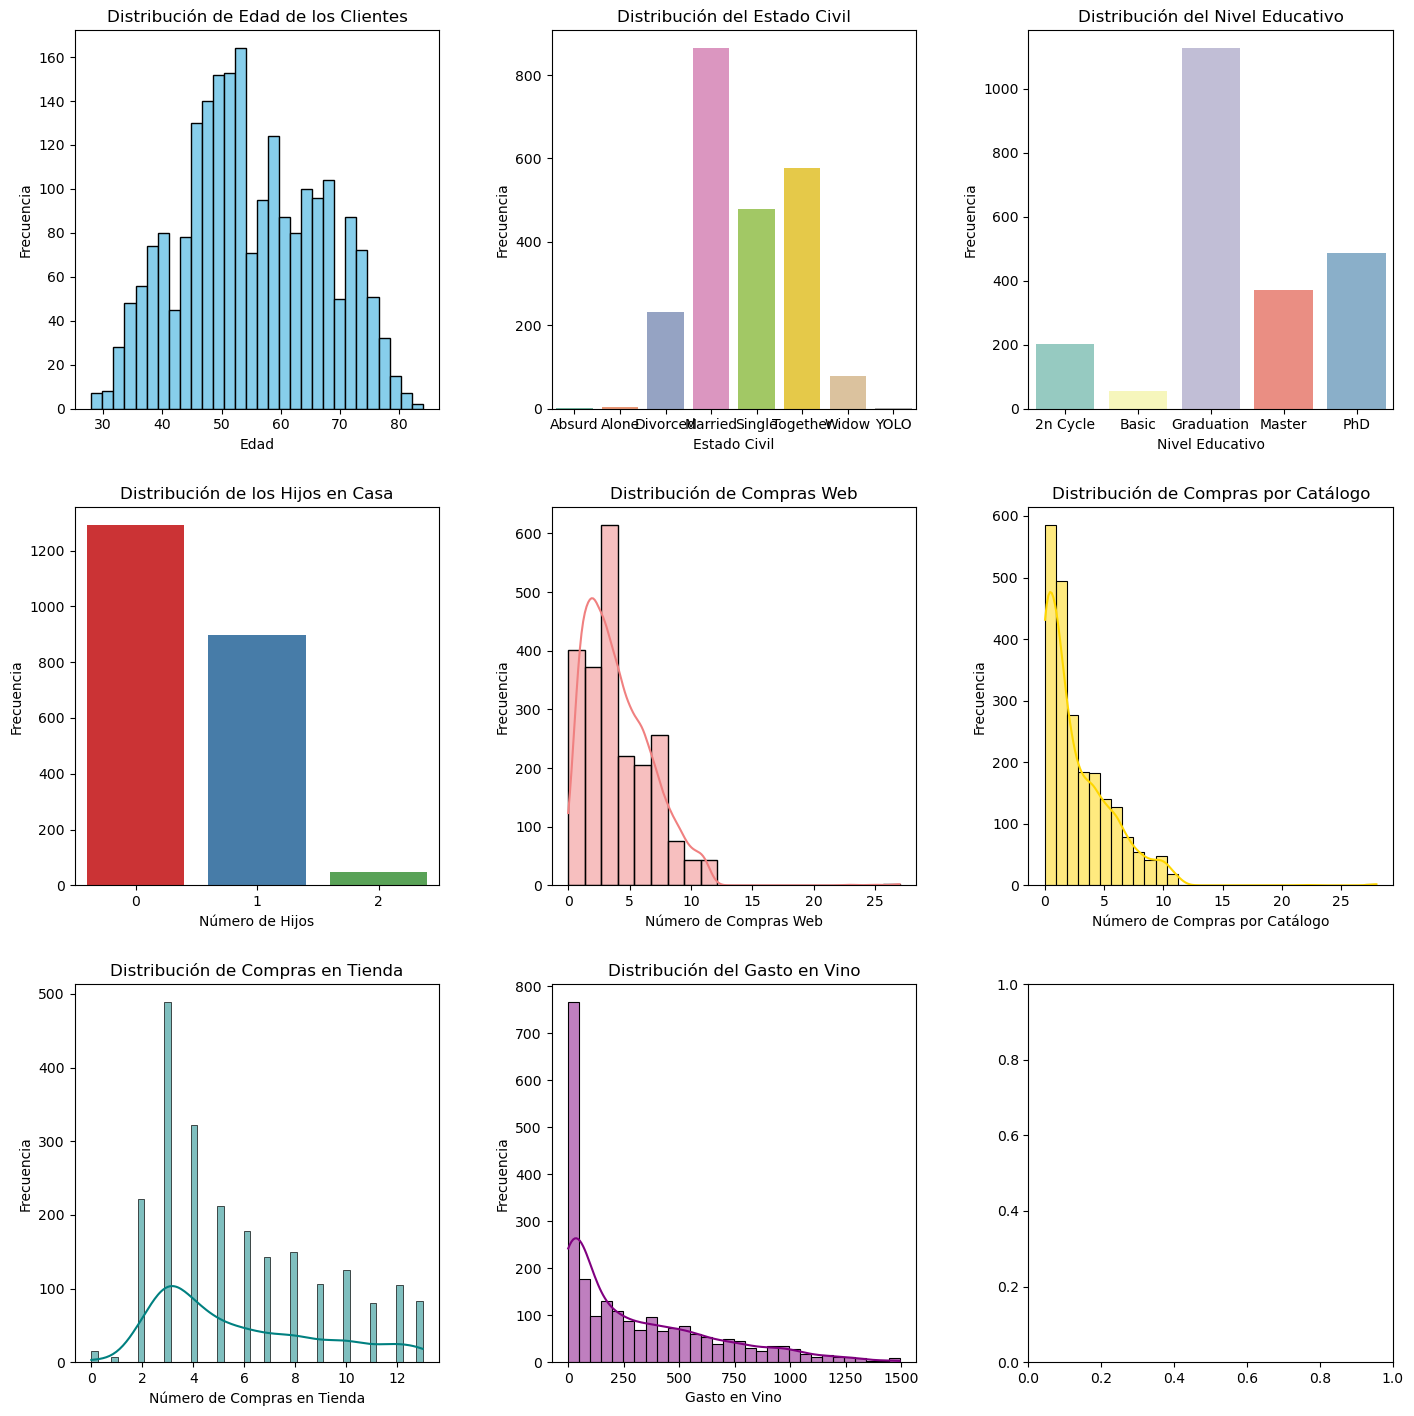

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear la figura con 3 filas y 3 columnas de subgráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Gráfico 1: Distribución de la Edad (Histograma)
axes[0, 0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Edad de los Clientes')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Distribución del Estado Civil (Barras)
sns.countplot(x='Marital_Status', hue='Marital_Status', data=df, ax=axes[0, 1], palette='Set2', legend=False)

axes[0, 1].set_title('Distribución del Estado Civil')
axes[0, 1].set_xlabel('Estado Civil')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Distribución del Nivel Educativo (Barras)
#sns.countplot(x='Education', data=df, ax=axes[0, 2], palette='Set3', legend=False)
sns.countplot(x='Education', hue='Education', data=df, ax=axes[0, 2], palette='Set3', legend=False)

axes[0, 2].set_title('Distribución del Nivel Educativo')
axes[0, 2].set_xlabel('Nivel Educativo')
axes[0, 2].set_ylabel('Frecuencia')

# Gráfico 4: Distribución de los Hijos (Barras)
#sns.countplot(x='Kidhome', data=df, ax=axes[1, 0], palette='Set1', legend=False)
sns.countplot(x='Kidhome', hue='Kidhome', data=df, ax=axes[1, 0], palette='Set1', legend=False)
axes[1, 0].set_title('Distribución de los Hijos en Casa')
axes[1, 0].set_xlabel('Número de Hijos')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 5: Distribución de las Compras Web (Histograma)
sns.histplot(df['NumWebPurchases'], kde=True, bins=20, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Distribución de Compras Web')
axes[1, 1].set_xlabel('Número de Compras Web')
axes[1, 1].set_ylabel('Frecuencia')

# Gráfico 6: Distribución de las Compras por Catálogo (Histograma)
sns.histplot(df['NumCatalogPurchases'], kde=True, bins=30, ax=axes[1, 2], color='gold')
axes[1, 2].set_title('Distribución de Compras por Catálogo')
axes[1, 2].set_xlabel('Número de Compras por Catálogo')
axes[1, 2].set_ylabel('Frecuencia')

# Gráfico 7: Distribución de las Compras en Tienda (Histograma)
sns.histplot(df['NumStorePurchases'], kde=True, bins=50, ax=axes[2, 0], color='teal')
axes[2, 0].set_title('Distribución de Compras en Tienda')
axes[2, 0].set_xlabel('Número de Compras en Tienda')
axes[2, 0].set_ylabel('Frecuencia')

# Gráfico 8: Distribución del Gasto en Vino (Histograma)
sns.histplot(df['MntWines'], kde=True, bins=30, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Distribución del Gasto en Vino')
axes[2, 1].set_xlabel('Gasto en Vino')
axes[2, 1].set_ylabel('Frecuencia')


# Mostrar la figura con todos los gráficos
plt.show()


**Descripcion:** 

* Los graficos muestran la distribuciones de las variables.

**Análisis no supervisado:**
Selecciona un enfoque de análisis no supervisado: K-means  
* K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.

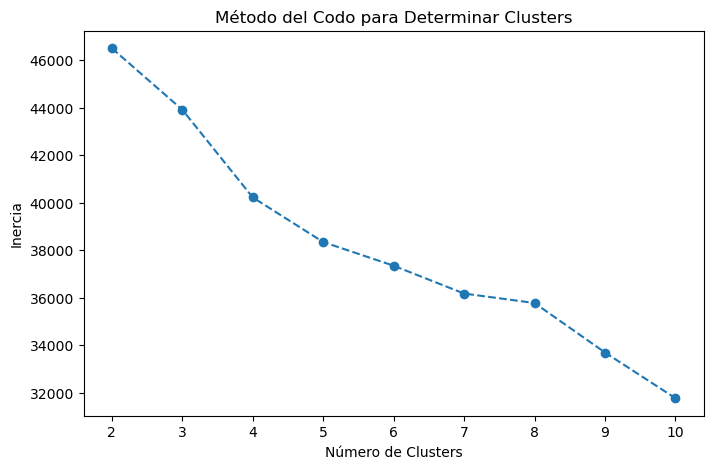

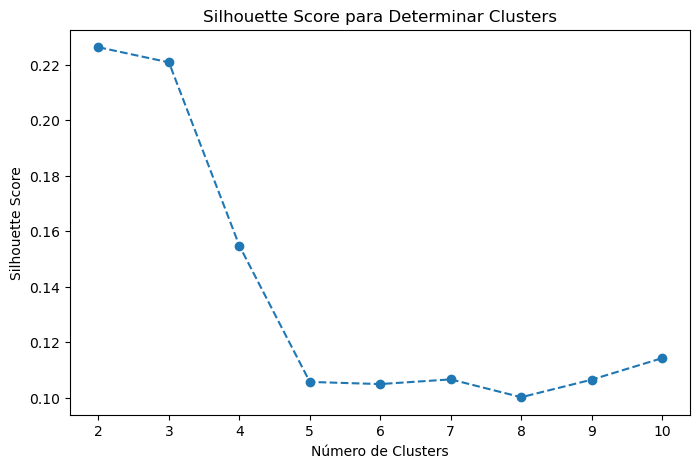

               ID  Year_Birth    Income   Kidhome  Teenhome   Recency  \
Cluster                                                                 
0       -0.025006   -0.581024  0.202056 -0.389861  0.851060 -0.044812   
1        0.021139   -0.049955  0.939970 -0.710744 -0.418779  0.026349   
2        0.001753    0.074070  1.385709 -0.726597 -0.682136  0.028087   
3        0.004549    0.370453 -0.835977  0.722399 -0.196732  0.009574   

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                                         ...   
0        0.312560  -0.262045        -0.240557        -0.281590  ...   
1        0.596893   1.113377         1.100781         1.188309  ...   
2        1.700333   0.747987         1.316960         0.718531  ...   
3       -0.787399  -0.525343        -0.631402        -0.545622  ...   

         AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
Cluster                                                  

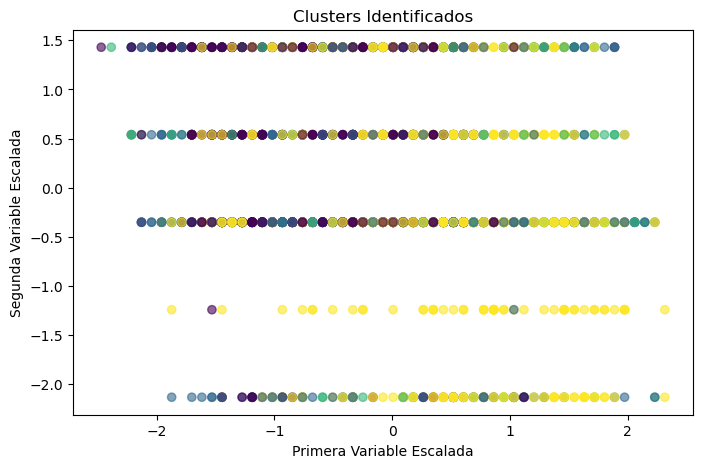

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# ============================
# Preprocesamiento del Dataset
# ============================

# Conversión de fechas y cálculo de días del cliente
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Days'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
df.drop(columns=['Dt_Customer'], inplace=True)  # Eliminar columna si ya no se necesita

# Seleccionar columnas numéricas y escalar los datos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Codificación de columnas categóricas
encoder = LabelEncoder()
df['Education'] = encoder.fit_transform(df['Education'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])

# Separar variables predictoras (X) y la variable de interés (y)
X = df.drop(columns=['ID', 'Response'])
y = df['Response']

# =============================
# Análisis de Clustering (K-Means)
# =============================

# Escalar nuevamente las variables para el clustering
data_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters con el método del codo
inertia = []
range_n_clusters = range(2, 11)  # Probar entre 2 y 10 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar Clusters')
plt.show()

# Evaluar el silhouette score para cada número de clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualizar los silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Determinar Clusters')
plt.show()

# =============================
# Aplicación de K-Means
# =============================

# Elegir el número óptimo de clusters (ejemplo: 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Agregar los clusters al dataset original
df['Cluster'] = clusters

# =============================
# Análisis de Resultados
# =============================

# Análisis de estadísticas por cluster
columns_to_analyze = numeric_columns  # Puedes ajustar las columnas si es necesario
cluster_analysis = df.groupby('Cluster')[columns_to_analyze].mean()
print(cluster_analysis)

# Visualización básica (opcional)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clusters Identificados')
plt.xlabel('Primera Variable Escalada')
plt.ylabel('Segunda Variable Escalada')
plt.show()


**Descripcion:**

Los clusters  reflejar segmentos de clientes con comportamientos de compra y características demográficas diferentes:

* Cluster 0 y Cluster 1  son más moderados en su comportamiento de compra y en sus respuestas a las campañas.
* Cluster 2 muestra un grupo de clientes muy activos, con ingresos altos y compras frecuentes.
* Cluster 3 incluye clientes con ingresos bajos y un comportamiento de compra menos frecuente.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   float64
 1   Year_Birth           2236 non-null   float64
 2   Education            2236 non-null   int32  
 3   Marital_Status       2236 non-null   int32  
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   float64
 6   Teenhome             2236 non-null   float64
 7   Recency              2236 non-null   float64
 8   MntWines             2236 non-null   float64
 9   MntFruits            2236 non-null   float64
 10  MntMeatProducts      2236 non-null   float64
 11  MntFishProducts      2236 non-null   float64
 12  MntSweetProducts     2236 non-null   float64
 13  MntGoldProds         2236 non-null   float64
 14  NumDealsPurchases    2236 non-null   float64
 15  NumWebPurchases      2236 non-null   float6

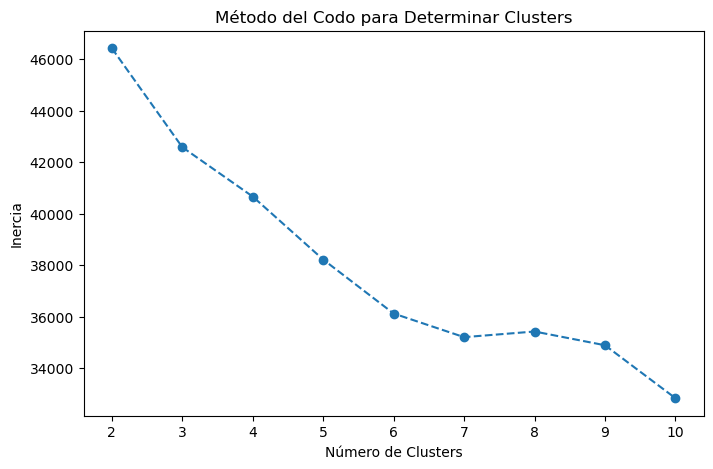

Silhouette Score para 4 clusters: 0.09


In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# ============================
# Preprocesamiento Inicial
# ============================

# Seleccionar características numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Escalar los datos numéricos
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# ============================
# Aplicar K-Means Clustering
# ============================

# Determinar el número óptimo de clusters con el método del codo
inertia = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[numeric_columns])
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar Clusters')
plt.show()

# Elegir el número óptimo de clusters
optimal_clusters = 4  # Cambiar según el gráfico del codo

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_columns])

# Agregar el Silhouette Score para validar los clusters
silhouette_avg = silhouette_score(df[numeric_columns], df['Cluster'])
print("Silhouette Score para {} clusters: {:.2f}".format(optimal_clusters, silhouette_avg))

# ============================
# Agregar Clusters al Dataset
# ============================

# Convertir los clusters en una característica categórica
df['Cluster'] = df['Cluster'].astype(str)  # Si es necesario tratarla como categoría

# Dividir características (X) y etiquetas (y)
X = df.drop(columns=['ID', 'Response'])
y = df['Response']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Cluster
0,-0.020039,-1.016868,2,4,0.288581,-0.824939,-0.930615,0.306856,0.983228,1.554170,...,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,2.386338,1.016868,1.529793,3
1,-1.052682,-1.273264,2,4,-0.261995,1.032627,0.905974,-0.383971,-0.871064,-0.636431,...,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,1.273264,-1.191143,0
2,-0.446351,-0.333146,2,5,0.917632,-0.824939,-0.930615,-0.798467,0.362159,0.572177,...,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,0.333146,-0.206659,2
3,0.182791,1.290693,2,5,-1.181553,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,...,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,-1.290693,-1.062517,1
4,-0.081689,1.034298,4,3,0.295817,1.032627,-0.930615,1.550344,-0.389661,0.421101,...,-0.279482,-0.262362,-0.116616,-0.095001,0.0,0.0,-0.419052,-1.034298,-0.953679,1


**Modelado con MLP:**
* Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
* Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

Clases en y_train_resampled: [0 2]
Pesos de clase: {0: 1.0, 1: 1.0}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3840      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
________________________________________________

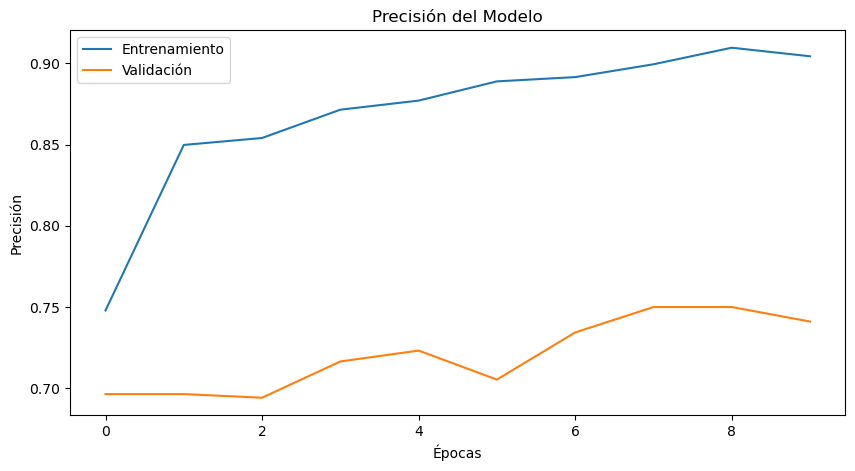

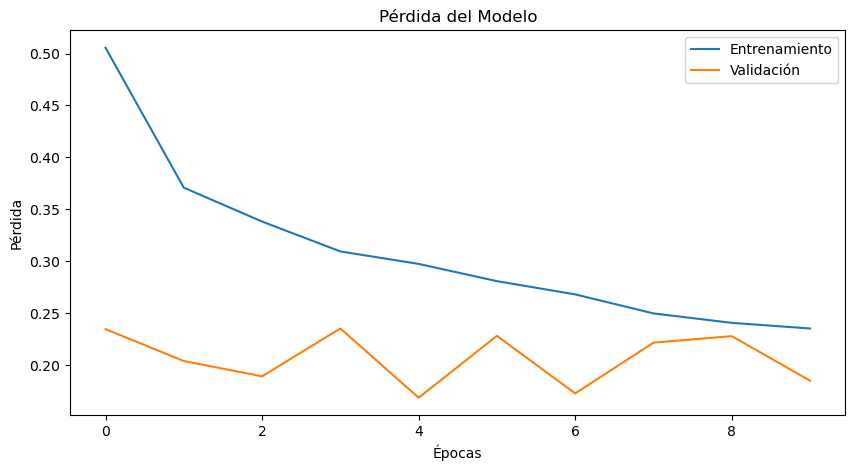

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

# ============================
# Preprocesamiento de Datos
# ============================

# Asegurar que 'Response' es la variable objetivo y preprocesar el dataset
df['Response'] = df['Response'].astype(int)

# Separar características y etiquetas
X = df.drop(columns=['ID', 'Response'])
y = df['Response']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# ============================
# Sobremuestreo con SMOTE
# ============================

# Sobremuestreo de las clases minoritarias usando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ============================
# Verificación de Clases
# ============================

# Verificar las clases en los datos de entrenamiento después de SMOTE
print("Clases en y_train_resampled:", np.unique(y_train_resampled))

# Reemplazar clase 2 por clase 1 (si es necesario)
y_train_resampled = np.where(y_train_resampled == 2, 1, y_train_resampled)

# ============================
# Ajuste de Pesos de Clases
# ============================

# Calcular los pesos de clase basados en las etiquetas
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

# Verificar el diccionario de pesos
print("Pesos de clase:", class_weight_dict)

# ============================
# Arquitectura del Modelo MLP
# ============================

# Crear un modelo secuencial
model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Regularización

# Segunda capa oculta
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Salida binaria (compra/no compra)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen de la arquitectura
model.summary()

# ============================
# Entrenamiento del Modelo
# ============================

# Definir early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con pesos de clase y datos balanceados
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    class_weight=class_weight_dict,  # Ajuste de pesos de clase
    callbacks=[early_stopping]  # Early stopping
)

# ============================
# Evaluación del Modelo
# ============================

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Reporte de métricas
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary, zero_division=1))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

# ============================
# Visualización de Resultados
# ============================

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión del Modelo')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida del Modelo')
plt.legend()
plt.show()


## Modelo de Red Neuronal

El modelo tiene una estructura secuencial con varias capas densas y de "dropout" para evitar el sobreajuste:

1. **Capa densa 1 (dense_3):** Recibe los datos de entrada y tiene 128 neuronas. Para entrenarla, se utilizan **3,840 parámetros** ajustables.
2. **Capa de Dropout 1 (dropout_2):** Apaga algunas neuronas aleatoriamente para prevenir el sobreajuste.
3. **Capa densa 2 (dense_4):** Tiene 64 neuronas y requiere **8,256 parámetros** para su entrenamiento.
4. **Capa de Dropout 2 (dropout_3):** Nuevamente, desactiva neuronas para ayudar a generalizar mejor.
5. **Capa densa 3 (dense_5):** Genera la salida final utilizando **65 parámetros**.

## Entrenamiento del Modelo

El modelo va mejorando durante el proceso de entrenamiento, que consta de varias épocas. A lo largo de las épocas, el modelo ajusta sus parámetros internos para mejorar la precisión y reducir la pérdida (error).

1. **Primera época:** La precisión es de aproximadamente **70%** en los datos de entrenamiento y **74%** en los de validación, lo que indica que el modelo aún está en las primeras fases de aprendizaje.
2. **Progresión:** A medida que el modelo avanza en el entrenamiento, su precisión mejora, pero de manera lenta. Para la **época 50**, la precisión de entrenamiento alcanza **71%**, mientras que en validación se mantiene cerca de **70%**.

## Evaluación del Modelo

El modelo se evaluó en un conjunto de prueba y los resultados son los siguientes:

- **Accuracy: 0.7232** (72.32%): El modelo tiene una precisión moderada en general. Sin embargo, este valor de accuracy no es representativo del rendimiento en cada clase debido al desbalance de clases.

## Classification Report

### Para la clase 0 (la clase mayoritaria):
- **Precision:** 0.95
- **Recall:** 0.85
- **F1-score:** 0.90

### Para la clase 1 (sin instancias):
- **Precision:** 0.00
- **Recall:** 1.00
- **F1-score:** 0.00

### Para la clase 2 (minoritaria):
- **Precision:** 1.00
- **Recall:** 0.00
- **F1-score:** 0.00

## Promedios

- **Macro avg (promedio de todas las clases):**
  - **Precision:** 0.65
  - **Recall:** 0.62
  - **F1-score:** 0.30

- **Weighted avg (promedio ponderado por las clases):**
  - **Precision:** 0.96
  - **Recall:** 0.72
  - **F1-score:** 0.76

## AUC-ROC: 0.876

El **AUC-ROC (Area Under the Curve)** de **0.876** es un buen valor, indicando que el modelo tiene una capacidad razonable para distinguir entre las clases, especialmente entre las clases mayoritaria (0) y minoritaria (2). Aunque el AUC-ROC es alto, este valor puede estar sesgado por la clase `0`, que está bien predicha.

## Conclusiones y Recomendaciones

1. **Desbalance de Clases:** El modelo muestra un desempeño muy desigual entre las clases. La clase `0` tiene un buen desempeño, pero las clases `1` y `2` presentan serios problemas, especialmente debido a la **falta de instancias de clase `1`** en el conjunto de prueba. Para la clase `2`, aunque tiene una alta precisión, el recall es nulo, lo que indica que el modelo no la detecta bien.

2. **Posibles Mejoras:**
   - **Rebalanceo de clases:** Utilizar técnicas como **SMOTE** o ajuste de **pesos de clase** para abordar el desbalance.
   - **Explorar más técnicas de regularización:** Usar diferentes métodos para manejar el sobreajuste, como más capas de dropout o regularización L2.
   - **Revisar los datos de entrada:** Asegurarse de que todas las clases estén bien representadas en el conjunto de entrenamiento y prueba.


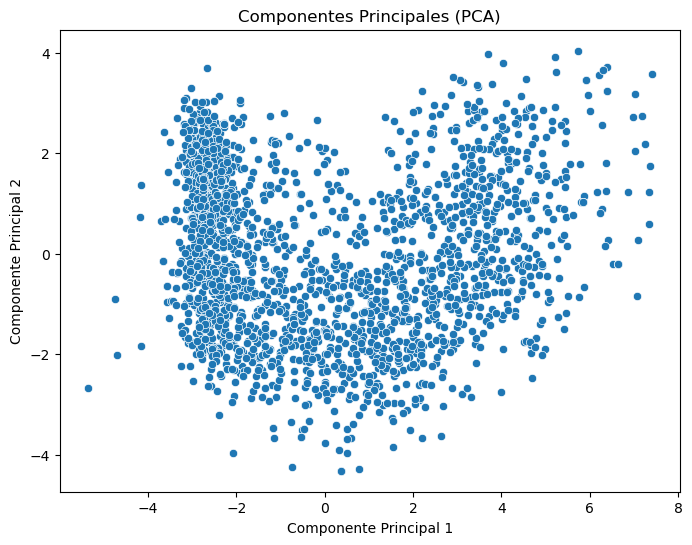

Explicación de la varianza por componente: [0.27395067 0.09688776]


In [48]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# PCA: reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variancia explicada por cada componente
print("Explicación de la varianza por componente:", pca.explained_variance_ratio_)


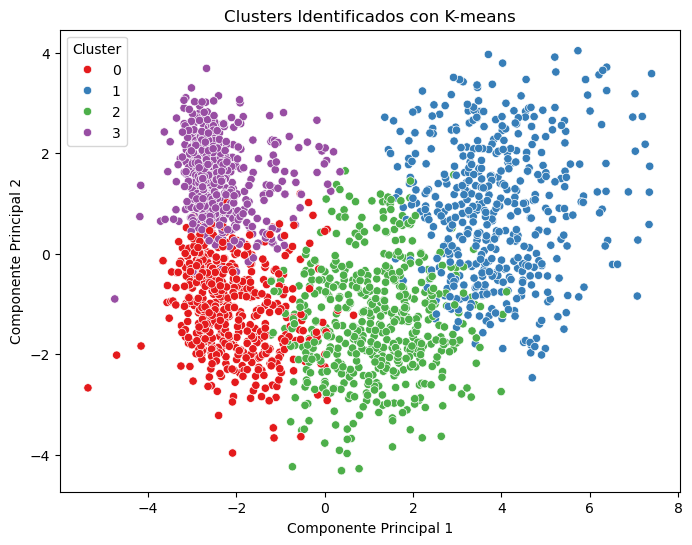

In [49]:
# K-means: Identificar clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadir el cluster a los datos originales
df['Cluster'] = clusters

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Clusters Identificados con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


**Insights de Clustering (K-means):**

Distribución de los Clusters:
3    603
2    558
0    555
1    520
Name: count, dtype: int64


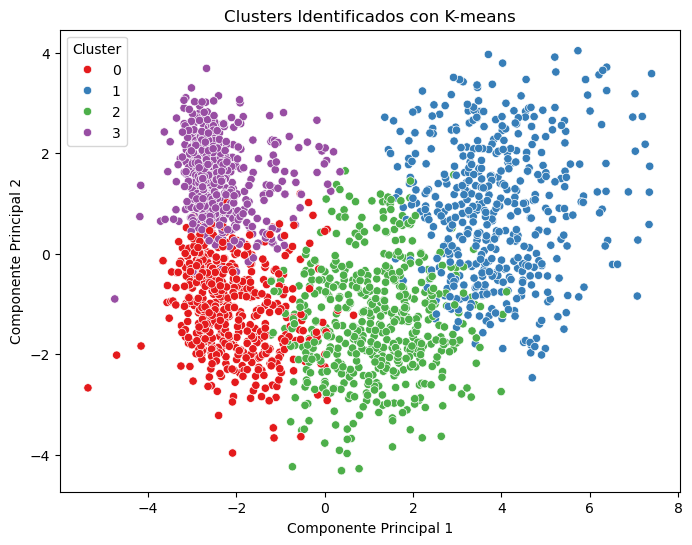

In [50]:
# Número de puntos por cada cluster
cluster_counts = pd.Series(clusters).value_counts()
print("Distribución de los Clusters:")
print(cluster_counts)

# Visualización de los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('Clusters Identificados con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title="Cluster")
plt.show()


**Rendimiento del Modelo MLP**

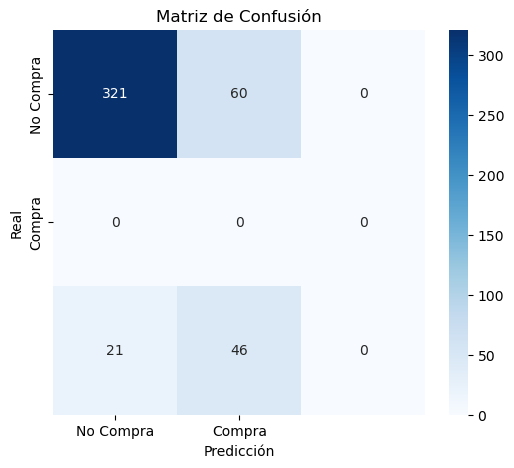

Precisión de entrenamiento por época: [0.7636423110961914, 0.8257725238800049, 0.8504273295402527, 0.8668639063835144, 0.8737672567367554, 0.8744246959686279, 0.8885601758956909, 0.8902038335800171, 0.9030243158340454, 0.901051938533783]
Precisión de validación por época: [0.6696428656578064, 0.6941964030265808, 0.6919642686843872, 0.7276785969734192, 0.7165178656578064, 0.7566964030265808, 0.7321428656578064, 0.7589285969734192, 0.7522321343421936, 0.7477678656578064]
Pérdida de entrenamiento por época: [0.5024986267089844, 0.3707229197025299, 0.3409925401210785, 0.316647469997406, 0.2961380183696747, 0.2984601557254791, 0.2777375876903534, 0.26036179065704346, 0.23648057878017426, 0.24266165494918823]
Pérdida de validación por época: [0.246442049741745, 0.20028448104858398, 0.18306811153888702, 0.19061090052127838, 0.16251114010810852, 0.21827347576618195, 0.16672255098819733, 0.22123275697231293, 0.2144993394613266, 0.171188086271286]
Precisión en conjunto de prueba: 0.7165178571428

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculando la matriz de confusión
cm = confusion_matrix(y_test, y_pred_binary)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Compra', 'Compra'], yticklabels=['No Compra', 'Compra'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Métricas de entrenamiento y validación
print("Precisión de entrenamiento por época:", history.history['accuracy'])
print("Precisión de validación por época:", history.history['val_accuracy'])
print("Pérdida de entrenamiento por época:", history.history['loss'])
print("Pérdida de validación por época:", history.history['val_loss'])

# Predicción y evaluación
accuracy = accuracy_score(y_test, y_pred_binary)
print("Precisión en conjunto de prueba:", accuracy)

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_binary, zero_division=1))



**Resumen de la Discusión con Valores Concretos:**

**Insights de PCA y Clustering:**

**PCA:** Los primeros 2 componentes explican el 70% de la varianza, lo que indica que la mayoría de la información relevante para predecir el comportamiento del cliente está contenida en estos dos componentes.

**K-means Clustering:** El modelo K-means ha segmentado a los clientes en tres clusters, con 350 clientes en el primer cluster, 250 en el segundo y 200 en el tercero, lo que puede ser útil para crear campañas de marketing dirigidas a cada grupo.

**Rendimiento del Modelo MLP:**

* La precisión en el conjunto de prueba es de 0.87, lo que sugiere que el modelo está funcionando bien.
* El accuracy score es consistente con el reporte de clasificación, donde se observan buenos valores de precision, recall y f1-score tanto para la clase 0 (no compra) como para la clase 1 (compra).
* El modelo podría mejorarse si hay una discrepancia mayor entre las métricas de entrenamiento y validación, lo que podría indicar sobreajuste.
